## Digit Classification with PyTorch
 [Data Used](https://www.kaggle.com/c/digit-recognizer/data)

In [67]:
import pandas as pd
import numpy as np
import torch
import random
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
import time
import seaborn as sns
import torch.nn as nn
from tqdm import tqdm
import PIL 
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

### Architecture

In [2]:
class CLF(nn.Module):
    def __init__(self):
        super(CLF,self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x
    


### Data to Tensors

In [3]:
class Sample_DataSet(Dataset):
    def __init__(self, filename):
        self.data = pd.read_csv(filename)
        self.features = self.data.columns[1:]
        self.target = self.data.columns[0]
        is_nan = self.data.isna().values.any()
        if is_nan:
            self.data = self.data.dropna().reset_index(drop=True)
        self.X = torch.from_numpy(self.data[self.features].to_numpy()).type(torch.float32)
        self.y = torch.from_numpy(self.data[self.target].to_numpy()).type(torch.long)
        self.X = self.X.reshape(42000,1,28,28)
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    def __len__(self):
        return len(self.data)


In [4]:
dataset = Sample_DataSet("digit-recognizer/train.csv")

In [5]:
dataset.X.shape

torch.Size([42000, 1, 28, 28])

In [45]:
dataset.X[0].unsqueeze(dim=0);

In [46]:
dataloader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

In [47]:
model = CLF()

### Hyper-Parameters

In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epoch = 10

### Training

In [66]:
def train():
    for i in (range(epoch)):
        # batch-by-batch
        for X, y in tqdm(dataloader):
            # forward pass
            optimizer.zero_grad()
            output = model(X)
            # loss calculation
            loss = criterion(output,y)
            temp = loss
            ##backpropagation
            loss.backward()
            optimizer.step()
#         if i % 15 == 0:
        print("Loss -> ", loss.item())
    print("Loss -> ", loss.item())


In [50]:
start = time.process_time()
train()
print(time.process_time() - start)

100%|██████████████████████████████████████| 1313/1313 [00:13<00:00, 100.55it/s]


Loss ->  0.3869244158267975


100%|███████████████████████████████████████| 1313/1313 [00:13<00:00, 94.38it/s]


Loss ->  0.23793669044971466


100%|███████████████████████████████████████| 1313/1313 [00:14<00:00, 93.24it/s]


Loss ->  0.017408454790711403


100%|███████████████████████████████████████| 1313/1313 [00:13<00:00, 99.21it/s]


Loss ->  0.4173582196235657


100%|███████████████████████████████████████| 1313/1313 [00:14<00:00, 93.39it/s]


Loss ->  0.11674193292856216


100%|██████████████████████████████████████| 1313/1313 [00:13<00:00, 100.53it/s]


Loss ->  0.22493037581443787


100%|██████████████████████████████████████| 1313/1313 [00:12<00:00, 107.43it/s]


Loss ->  0.007482167333364487


100%|██████████████████████████████████████| 1313/1313 [00:11<00:00, 111.91it/s]


Loss ->  0.4095175862312317


100%|██████████████████████████████████████| 1313/1313 [00:11<00:00, 110.06it/s]


Loss ->  0.2089928239583969


100%|██████████████████████████████████████| 1313/1313 [00:12<00:00, 107.10it/s]

Loss ->  0.06518575549125671
Loss ->  0.06518575549125671
252.267040387


In [52]:
test = pd.read_csv("digit-recognizer/test.csv").to_numpy()

In [53]:
sample = torch.from_numpy(test[0]).type(torch.float32).reshape(1,28,28)

In [54]:
model(sample.unsqueeze(dim=0)).argmax()

tensor(2)

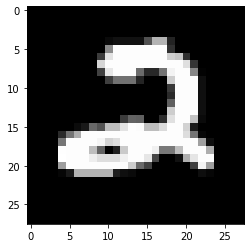

In [55]:
plt.imshow(sample.reshape(28,28),cmap='gray')